<a href="https://colab.research.google.com/github/Cho-Yi-Ju/red-wine-quality/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
datapath = '/content/gdrive/My Drive/'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score


data = pd.read_csv(datapath + "winequality-red.csv", header = 0 , encoding="utf-8")

feature_name = ["fixed acidity" , "volatile acidity","citric acid","residual sugar","chlorides"
                ,"free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

X = data[feature_name]
'''
data['quality'] = data['quality'].map({
        3 : 0,
        4 : 0,
        5 : 0,
        6 : 0,
        7 : 1,
        8 : 1         
}) 

y = data['quality']
'''
y = data.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


Decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=100 , random_state=100)

decision = Decision_tree.fit(X_train , y_train)
scores = cross_val_score(decision, X_train, y_train, cv=5)

Sum = 0 
for i in range(len(scores)):
    Sum += scores[i]
Valid = Sum/5
train_pred = decision.predict(X_train)
y_pred = decision.predict(X_test)
label = set()
for y_p in y_pred:
    label.add(y_p)
label = list(label)

print(classification_report(y_test , y_pred , labels=label))
print("Training accuracy: ", accuracy_score(y_train, train_pred))
print("Validation accuracy: ", Valid)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("RMSE: " , np.sqrt(mean_squared_error(y_test,y_pred)))
print("MSE: " , mean_squared_error(y_test,y_pred))
print("MAE: " , mean_absolute_error(y_test,y_pred))
print("R_square: " , r2_score(y_test,y_pred))




              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.25      0.29        12
           5       0.73      0.72      0.73       133
           6       0.64      0.55      0.59       137
           7       0.38      0.66      0.48        32
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.35      0.36      0.35       320
weighted avg       0.63      0.61      0.61       320

Training accuracy:  1.0
Validation accuracy:  0.5935253694668902
Accuracy:  0.6125
RMSE:  0.7786205751198718
MSE:  0.60625
MAE:  0.45625
R_square:  0.03386454183266929


In [ ]:
import graphviz 
from sklearn.tree import export_graphviz
Decision_tree.fit(X_train , y_train)
#dot_data = export_graphviz(Decision_tree, out_file= datapath + 'tree_decision_regressor.dot', max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
dot_data = export_graphviz(Decision_tree, out_file= None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 

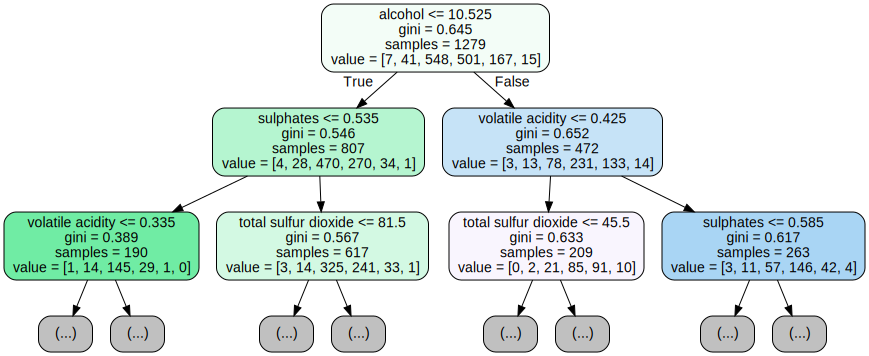

In [ ]:
valgTre

In [ ]:
from subprocess import call
call(['dot', '-Tpng', datapath+'tree_decision_regressor.dot', '-o', datapath+'tree_decision_regressor.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = datapath + 'tree_decision_regressor.png')